## 5. Final Models (Full Dataset)

## Import Packages and Load dataset

In [1]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
pd.set_option("display.max_columns", 101)

import warnings
warnings.simplefilter("ignore")

In [25]:
# Load train dataset
df_train = pd.read_csv('./Dataset/train.csv')
df_test = pd.read_csv('./Dataset/test.csv')

## Overview of Dataset

In [26]:
# View a Sample
df_train.sample(10)
df_test.sample(10)

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom
14395,37125,9601,74,0,1,80,65461,3,7,2016,1,1,3579,5678,636,0,9
10827,33557,93746,26,0,0,32,62542,6,3,2003,0,0,473,559,583,0,4
1288,24018,10872,39,1,0,84,14611,5,4,2000,1,0,6293,422,411,0,10
14310,37040,38969,12,1,1,50,8410,8,8,2019,1,1,6113,2730,352,1,0
14058,36788,89245,51,0,1,45,34921,6,1,2020,1,1,1587,1754,114,1,8
4191,26921,79959,69,1,0,50,19449,8,10,1994,1,1,5275,9254,662,1,0
9834,32564,21765,99,0,0,34,98059,2,5,2000,0,1,9960,6031,341,0,0
2481,25211,5624,86,0,0,98,46201,3,1,2014,0,0,1337,4155,137,0,5
5592,28322,925,35,1,0,83,37605,2,4,1998,0,1,7951,732,438,0,2
6402,29132,9950,4,1,1,77,34754,5,2,2000,0,1,6381,6723,213,1,9


In [27]:
df_train.shape
df_test.shape

(15154, 17)

In [28]:
df_train.columns

Index(['id', 'squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [29]:
# Check for missing values
print('Duplicatedt train values:', df_train.duplicated().sum())
print('Duplicated test values:', df_test.duplicated().sum())

Duplicatedt train values: 0
Duplicated test values: 0


### Merge Datasets for Processing

In [30]:
# Drop ID Column
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [31]:
# Create a set variable to differnetiate between train and test
df_train['section'] = "Train"
df_test['section'] = "Test"

In [32]:
# Create a Sale Price column for df_test and set to 0 as a placeholder
df_test['price'] = 0

In [33]:
# Stack the datasets
df = pd.concat([df_train, df_test], ignore_index=True, axis = 0, sort = False)

## Missing Values & Imputation

Text(0.5, 1.0, 'Missing Values by Feature')

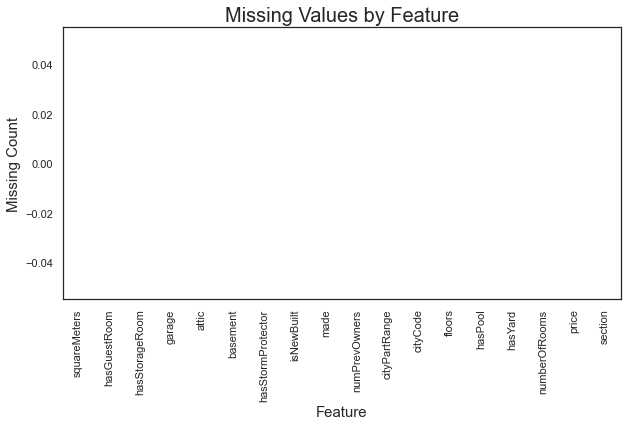

In [34]:
# Check for Columns with NA values
missing = df.isnull().sum()

# Vizualize missing value count
missing = missing[missing >= 0]
missing.sort_values(inplace=True)
missing.plot.bar(figsize = (10,5))
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Missing Count',fontsize = 15)
plt.title('Missing Values by Feature', fontsize=20)

In [35]:
# Check Number of missing numerically
print(missing)

squareMeters         0
hasGuestRoom         0
hasStorageRoom       0
garage               0
attic                0
basement             0
hasStormProtector    0
isNewBuilt           0
made                 0
numPrevOwners        0
cityPartRange        0
cityCode             0
floors               0
hasPool              0
hasYard              0
numberOfRooms        0
price                0
section              0
dtype: int64


### Check Missingness

In [36]:
missing = df.isnull().sum()
missing = missing[missing > 0]
print('Missing Values:',missing.sum())

Missing Values: 0


### Numerical Data

In [37]:
# Assuming your DataFrame is named 'df'

# List of column names to convert to int
columns_to_convert = ['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors', 'cityCode', 'cityPartRange',
                      'numPrevOwners', 'made', 'isNewBuilt', 'hasStormProtector', 'basement', 'attic', 'garage',
                      'hasStorageRoom', 'hasGuestRoom']

# Convert specified columns to int
df[columns_to_convert] = df[columns_to_convert].astype(int)



In [38]:
num_cols = df.columns[(df.dtypes == float) | (df.dtypes == int)].tolist()
num_cols

num = df[num_cols].copy()
num

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.2
1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.0
2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.1
3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.2
4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37879,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1,0.0
37880,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0,0.0
37881,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10,0.0
37882,77604,51,0,1,33,67056,4,3,2019,0,0,9578,9706,135,0,2,0.0


<AxesSubplot:>

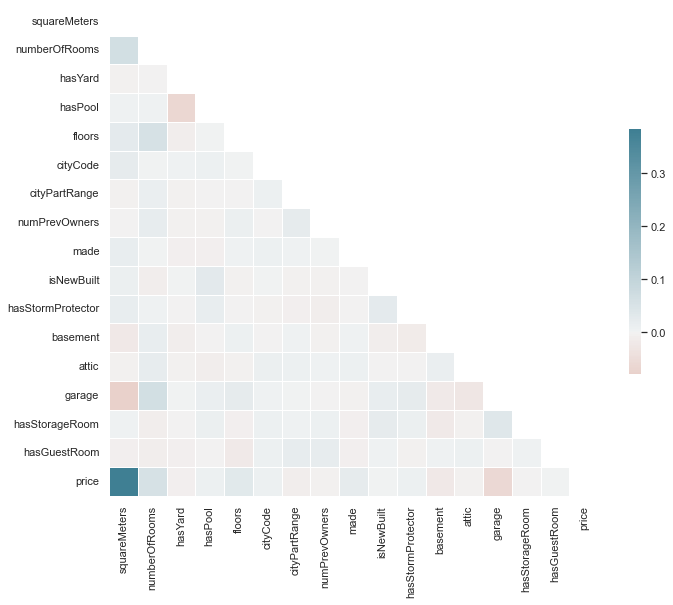

In [39]:
# Correlation Matrix - Numerically
corr = num.corr()
corr

# Correlation Matrix - Graphically
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(20,220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Dummify and Split Data for Modeling

In [40]:
# Code Breakdown to ordinal so that it is not dummified
df['section'] = df['section'].map({'Test': 0, 'Train': 1}).astype(int)

In [41]:
# Dummify
df = pd.get_dummies(df,drop_first=True)

### Transformations

In [42]:
# skew(num)

In [44]:
# skewed_feats = df[num_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(10)

In [45]:
# skewness = skewness[abs(skewness.Skew)>0.75]

# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     df[feat] = boxcox1p(df[feat], lam)

In [46]:
# Split Data into Original Groups
train = df[df['section'] == 1].drop(columns=['section'])
test = df[df['section'] == 0].drop(columns=['section'])

### Drop Outliers

In [47]:
# Remove Response Variable from X_tr
X_tr = train.drop(columns=['price'])
#X_tr.to_csv("X_tr.csv",index = False)

# Set Response Variable y_tr
y_tr = train['price']
#y_tr.to_csv("y_tr.csv",index = False)

# Remove Response Variable from X_tr
X_te = test.drop(columns=['price'])
#X_te.to_csv("X_te.csv",index = False)

### Ridge Regression

In [48]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [49]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X_tr)
x_new = transformer.transform(X_tr)

In [50]:
from sklearn.model_selection import GridSearchCV

alphas = np.linspace(1e-3,200,20)
gs = GridSearchCV(ridge, {"alpha":alphas},cv=5,scoring="neg_mean_squared_error")
gs.fit(X_tr, np.log(y_tr))

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-03, 1.05272632e+01, 2.10535263e+01, 3.15797895e+01,
       4.21060526e+01, 5.26323158e+01, 6.31585789e+01, 7.36848421e+01,
       8.42111053e+01, 9.47373684e+01, 1.05263632e+02, 1.15789895e+02,
       1.26316158e+02, 1.36842421e+02, 1.47368684e+02, 1.57894947e+02,
       1.68421211e+02, 1.78947474e+02, 1.89473737e+02, 2.00000000e+02])},
             scoring='neg_mean_squared_error')

In [51]:
gs.best_params_

{'alpha': 200.0}

### Lets run cross valdiation to calculate our test error

In [52]:
import sklearn.model_selection as ms
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [53]:
ridge.set_params(alpha=21.053526315789476,normalize = False)
rmse = np.sqrt(-ms.cross_val_score(ridge,X=x_new, y=np.log(y_tr), scoring="neg_mean_squared_error", cv = 5))
rmse.mean()

1.2751755355397971

### Fit Model on Training Set

In [54]:
ridge.set_params(alpha=21.053526315789476)
ridge.fit(x_new, np.log(y_tr))

Ridge(alpha=21.053526315789476, normalize=False)

In [55]:
ridge.coef_

array([ 5.69140536e-01,  8.67878784e-02, -1.74649949e-02,  4.85363511e-03,
        2.32921346e-02,  8.61416187e-03, -3.62850266e-03, -5.08231594e-03,
        1.37097245e-03,  2.17157898e-02,  1.37560868e-02, -1.82147654e-02,
       -2.37383840e-02, -1.72833906e-01, -4.39655642e-04, -3.89344485e-02])

### Make a Prediction

In [56]:
x_new1 = transformer.transform(X_te)
predict_ridge = ridge.predict(x_new1)

In [57]:
predict_ridge

array([15.10010679, 15.21276285, 15.60729506, ..., 15.15691974,
       15.45472847, 14.60316031])

In [60]:
predict('Ridge_Regression.csv',predict_ridge)

File Saved!


### Lasso

In [61]:
alphas = np.linspace(1e-3,200,20)
gs = GridSearchCV(lasso, {"alpha":alphas},cv=5,scoring="neg_mean_squared_error")
gs.fit(x_new, np.log(y_tr))

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-03, 1.05272632e+01, 2.10535263e+01, 3.15797895e+01,
       4.21060526e+01, 5.26323158e+01, 6.31585789e+01, 7.36848421e+01,
       8.42111053e+01, 9.47373684e+01, 1.05263632e+02, 1.15789895e+02,
       1.26316158e+02, 1.36842421e+02, 1.47368684e+02, 1.57894947e+02,
       1.68421211e+02, 1.78947474e+02, 1.89473737e+02, 2.00000000e+02])},
             scoring='neg_mean_squared_error')

In [62]:
gs.best_params_

{'alpha': 10.527263157894737}

In [63]:
lasso.set_params(alpha=0.001)
rmse = np.sqrt(-ms.cross_val_score(lasso,X=x_new, y=np.log(y_tr), scoring="neg_mean_squared_error", cv = 5))
rmse.mean()

1.2759425769065738

In [64]:
lasso.fit(x_new, np.log(y_tr))

Lasso(alpha=0.001)

In [65]:
lasso.coef_

array([ 5.69025434e-01,  8.35471055e-02, -1.36634356e-02,  1.29767620e-03,
        2.25248589e-02,  5.36322001e-03, -3.75231327e-04, -1.74215870e-03,
        1.35868239e-03,  1.78606367e-02,  9.97342170e-03, -1.57380926e-02,
       -2.10316642e-02, -1.69873617e-01, -0.00000000e+00, -3.65600057e-02])

In [66]:
temp = pd.DataFrame({
    "Feature": X_tr.columns,
    "Coef": lasso.coef_
})

temp[temp.Coef != 0].sort_values(by = "Coef", ascending = False)

,Feature,Coef
0,squareMeters,0.569025
1,numberOfRooms,0.083547
4,floors,0.022525
9,isNewBuilt,0.017861
10,hasStormProtector,0.009973
5,cityCode,0.005363
8,made,0.001359
3,hasPool,0.001298
6,cityPartRange,-0.000375
7,numPrevOwners,-0.001742


In [67]:
predict_lasso = lasso.predict(x_new1)

In [68]:
predict('Lasso_Regression.csv',predict_lasso)

File Saved!


### ElasticNet

In [69]:
### ElasticNet
alphaSize  = 40
rhoSize    = 30
alphaRange = np.linspace(1e-2, 10, alphaSize)
rhoRange   = np.linspace(0.01, 1, rhoSize)

parametersGrid = {"alpha": alphaRange,
                  "l1_ratio": rhoRange}

grid = GridSearchCV(net, parametersGrid, cv=5)
grid.fit(x_new, np.log(y_tr))

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([ 0.01      ,  0.26615385,  0.52230769,  0.77846154,  1.03461538,
        1.29076923,  1.54692308,  1.80307692,  2.05923077,  2.31538462,
        2.57153846,  2.82769231,  3.08384615,  3.34      ,  3.59615385,
        3.85230769,  4.10846154,  4.36461538,  4.62076923,  4.87692308,
        5.13307692,  5.38923077,  5.64538462,  5.90153846,  6.15769231,
        6.41384615,  6.67      ,  6.9...
        8.97538462,  9.23153846,  9.48769231,  9.74384615, 10.        ]),
                         'l1_ratio': array([0.01      , 0.04413793, 0.07827586, 0.11241379, 0.14655172,
       0.18068966, 0.21482759, 0.24896552, 0.28310345, 0.31724138,
       0.35137931, 0.38551724, 0.41965517, 0.4537931 , 0.48793103,
       0.52206897, 0.5562069 , 0.59034483, 0.62448276, 0.65862069,
       0.69275862, 0.72689655, 0.76103448, 0.79517241, 0.82931034,
       0.86344828, 0.89758621, 0.93172414, 0.96586207, 1.        ])})

In [70]:
grid.best_params_

{'alpha': 1.0346153846153847, 'l1_ratio': 0.01}

In [71]:
net.set_params(alpha=0.01, l1_ratio=0.04413793103448276)
rmse = np.sqrt(-ms.cross_val_score(net,X=x_new, y=np.log(y_tr), scoring="neg_mean_squared_error", cv = 5))
rmse.mean()

1.2614157088487867

In [72]:
net.fit(x_new, np.log(y_tr))

ElasticNet(alpha=0.01, l1_ratio=0.04413793103448276)

In [73]:
predict_net = net.predict(x_new1)

In [74]:
predict('ElasticNet_Regression.csv',predict_net)

File Saved!


### Gradient Boosting

In [75]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [76]:
gbm = GradientBoostingRegressor()

In [77]:
gbm.fit(x_new, np.log(y_tr))

GradientBoostingRegressor()

In [78]:
gbm.score(x_new, np.log(y_tr))

0.9945690938390408

In [79]:
predict_gbm = gbm.predict(x_new1)

In [82]:
predict('Gradient_Boosting.csv',predict_gbm)

File Saved!


In [83]:
gbm.feature_importances_

array([9.98505755e-01, 1.18220307e-04, 0.00000000e+00, 1.37781651e-07,
       2.92655651e-05, 1.02144962e-03, 2.72071663e-07, 1.63480830e-04,
       2.47039294e-05, 0.00000000e+00, 0.00000000e+00, 7.75703320e-06,
       4.02835375e-05, 6.15301104e-05, 1.19036718e-06, 2.59541327e-05])

In [89]:
predict_lasso

array([15.09734874, 15.21276764, 15.60390405, ..., 15.16225405,
       15.45121178, 14.60455137])

In [90]:
predict_net

array([15.09549165, 15.21012407, 15.59793819, ..., 15.15902029,
       15.44679068, 14.60779744])

In [91]:
predict_ridge

array([15.10010679, 15.21276285, 15.60729506, ..., 15.15691974,
       15.45472847, 14.60316031])

In [85]:
predict_avg = ((0.5*predict_ridge) + (0.5*predict_net))

In [86]:
predict_avg

array([15.09779922, 15.21144346, 15.60261663, ..., 15.15797001,
       15.45075957, 14.60547888])

## Submit

In [87]:
# Input filename as a .csv

def predict(filename, prediction):
    vals = np.exp(prediction)
    indexes = list(range(1461,1461+len(vals)))
    predictions = pd.DataFrame()
    predictions['id'] = indexes
    predictions['price'] = vals
    predictions.to_csv('./kaggle_submissions/'+filename,index = False)
    print('File Saved!')

In [88]:
predict("predict_average_regression.csv",predict_avg)

File Saved!


- - -